In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/education-and-career-success/education_career_success.csv


# Lets explore the data

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/education-and-career-success/education_career_success.csv")
df.shape

(5000, 20)

In [4]:
df.head(3)

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No


In [5]:
df1 = df.drop('Student_ID',axis=1)

In [6]:
df1.columns = df1.columns.str.replace(" ","_").str.lower()
df1.head(3)

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,internships_completed,projects_completed,certifications,soft_skills_score,networking_score,job_offers,starting_salary,career_satisfaction,years_to_promotion,current_job_level,work_life_balance,entrepreneurship
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5000 non-null   int64  
 1   gender                 5000 non-null   object 
 2   high_school_gpa        5000 non-null   float64
 3   sat_score              5000 non-null   int64  
 4   university_ranking     5000 non-null   int64  
 5   university_gpa         5000 non-null   float64
 6   field_of_study         5000 non-null   object 
 7   internships_completed  5000 non-null   int64  
 8   projects_completed     5000 non-null   int64  
 9   certifications         5000 non-null   int64  
 10  soft_skills_score      5000 non-null   int64  
 11  networking_score       5000 non-null   int64  
 12  job_offers             5000 non-null   int64  
 13  starting_salary        5000 non-null   float64
 14  career_satisfaction    5000 non-null   int64  
 15  year

In [8]:
df1.isnull().sum()

age                      0
gender                   0
high_school_gpa          0
sat_score                0
university_ranking       0
university_gpa           0
field_of_study           0
internships_completed    0
projects_completed       0
certifications           0
soft_skills_score        0
networking_score         0
job_offers               0
starting_salary          0
career_satisfaction      0
years_to_promotion       0
current_job_level        0
work_life_balance        0
entrepreneurship         0
dtype: int64

In [9]:
df1.describe()

,age,high_school_gpa,sat_score,university_ranking,university_gpa,internships_completed,projects_completed,certifications,soft_skills_score,networking_score,job_offers,starting_salary,career_satisfaction,years_to_promotion,work_life_balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


# Eda of numeric and categorical variables

In [10]:
numeric_columns = ['age', 'high_school_gpa', 'sat_score', 'university_ranking',
       'university_gpa', 'internships_completed', 'projects_completed',
       'certifications', 'soft_skills_score', 'networking_score', 'job_offers',
       'starting_salary', 'career_satisfaction', 'years_to_promotion',
       'work_life_balance']
 

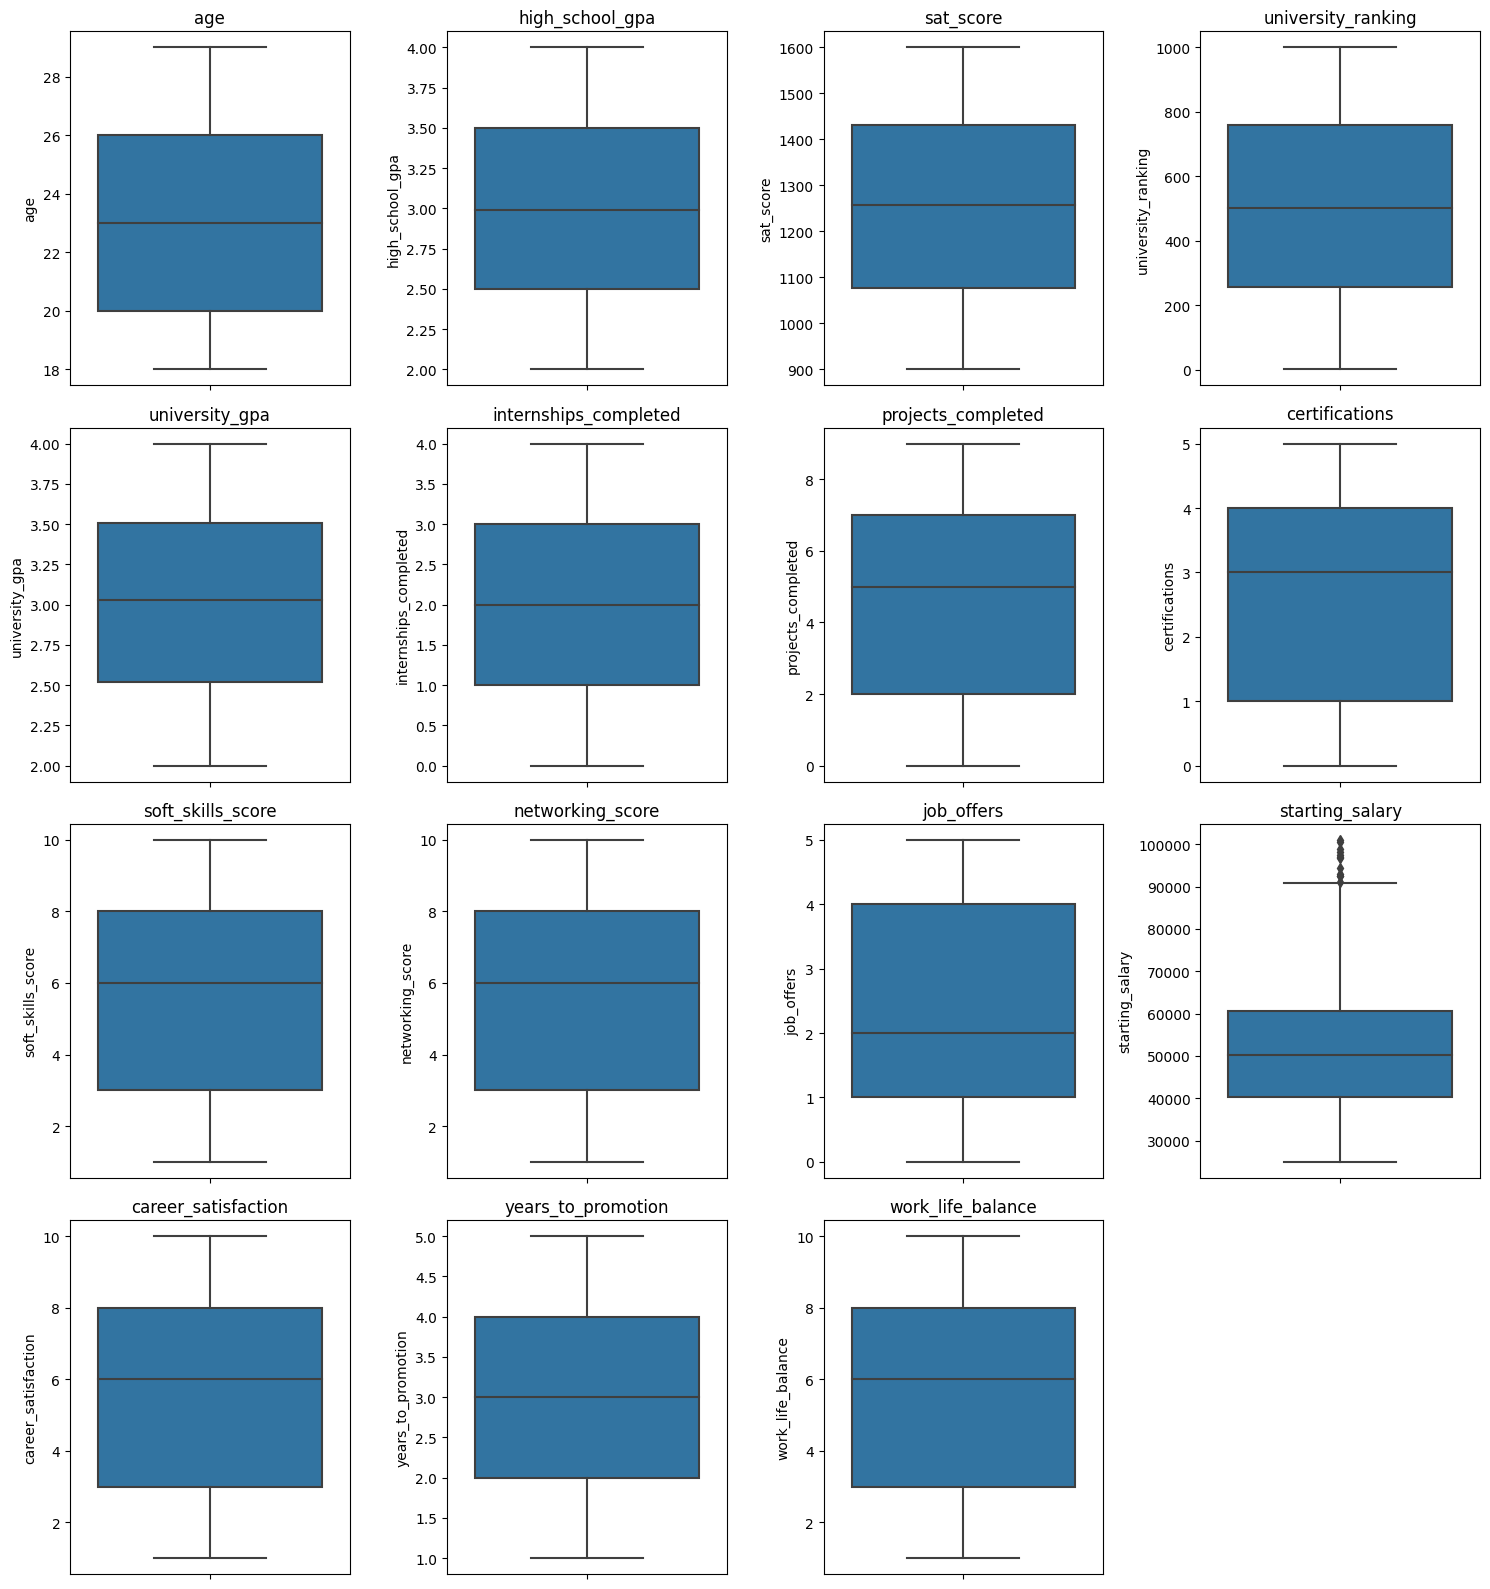

In [11]:
num_cols = 4  
num_rows = int(np.ceil(len(numeric_columns) / num_cols))  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df1[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

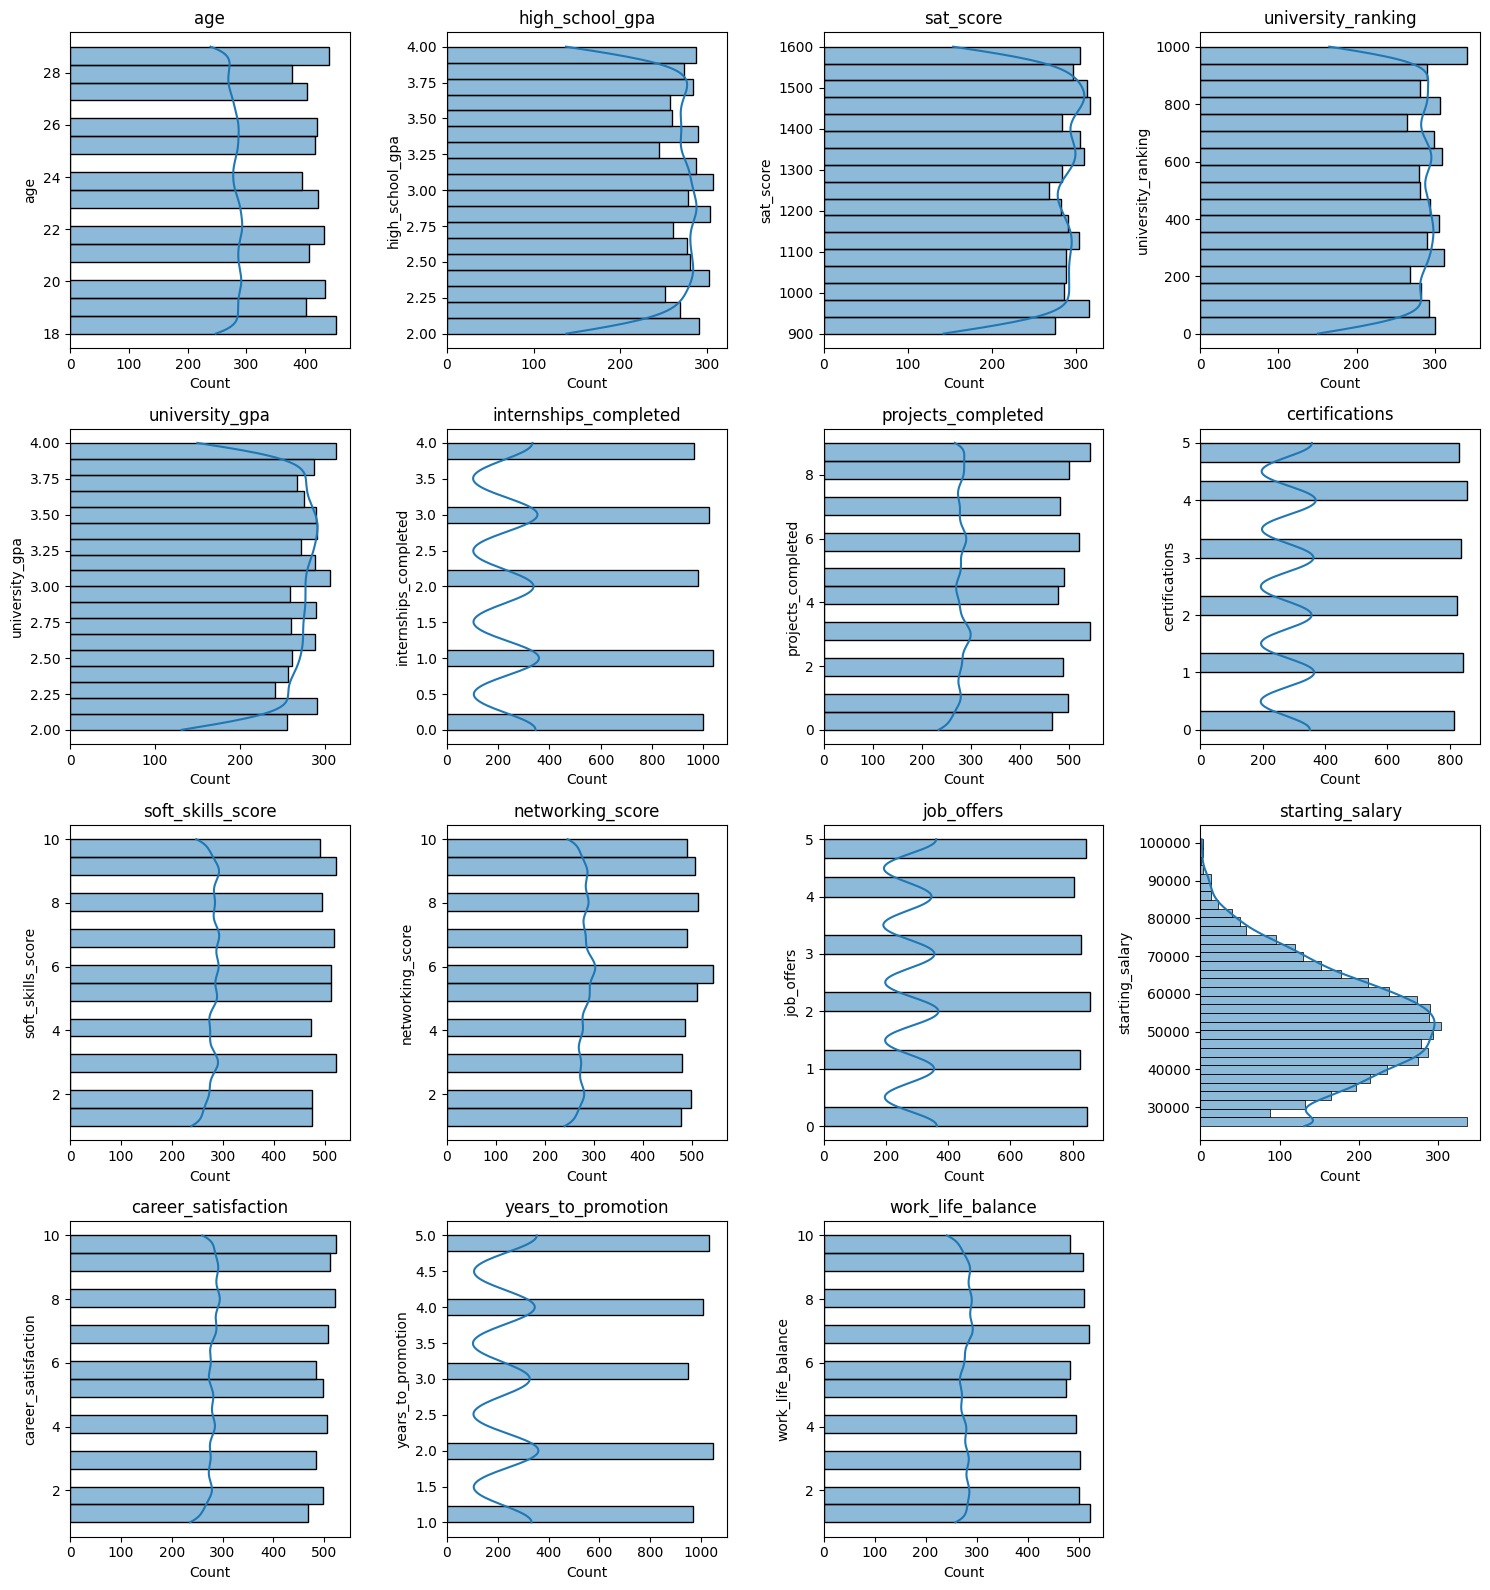

In [12]:
num_cols = 4  
num_rows = int(np.ceil(len(numeric_columns) / num_cols))  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_columns):
    sns.histplot(y=df1[col], ax=axes[i],kde =True)
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

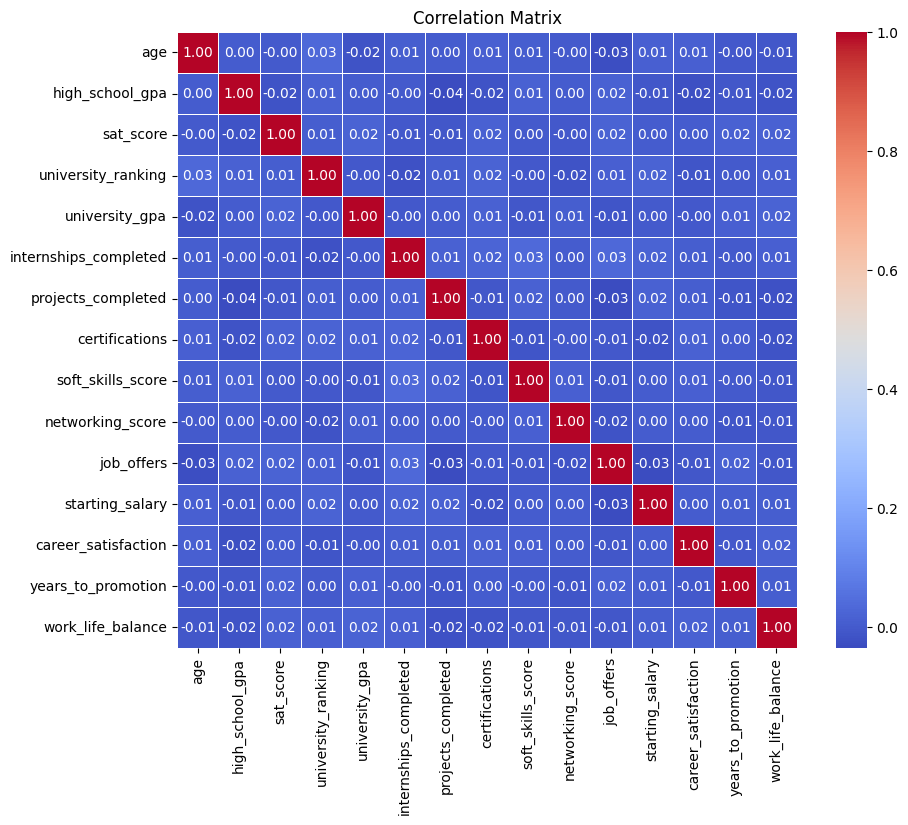

In [13]:
numeric_columns = df1.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
plt.show()

In [14]:
categorical_features = df1.select_dtypes(include=['object']).columns

In [15]:
for col in categorical_features:
    print(col, "-->", df1[col].unique())

gender --> ['Male' 'Other' 'Female']
field_of_study --> ['Arts' 'Law' 'Medicine' 'Computer Science' 'Engineering' 'Business'
 'Mathematics']
current_job_level --> ['Entry' 'Mid' 'Senior' 'Executive']
entrepreneurship --> ['No' 'Yes']


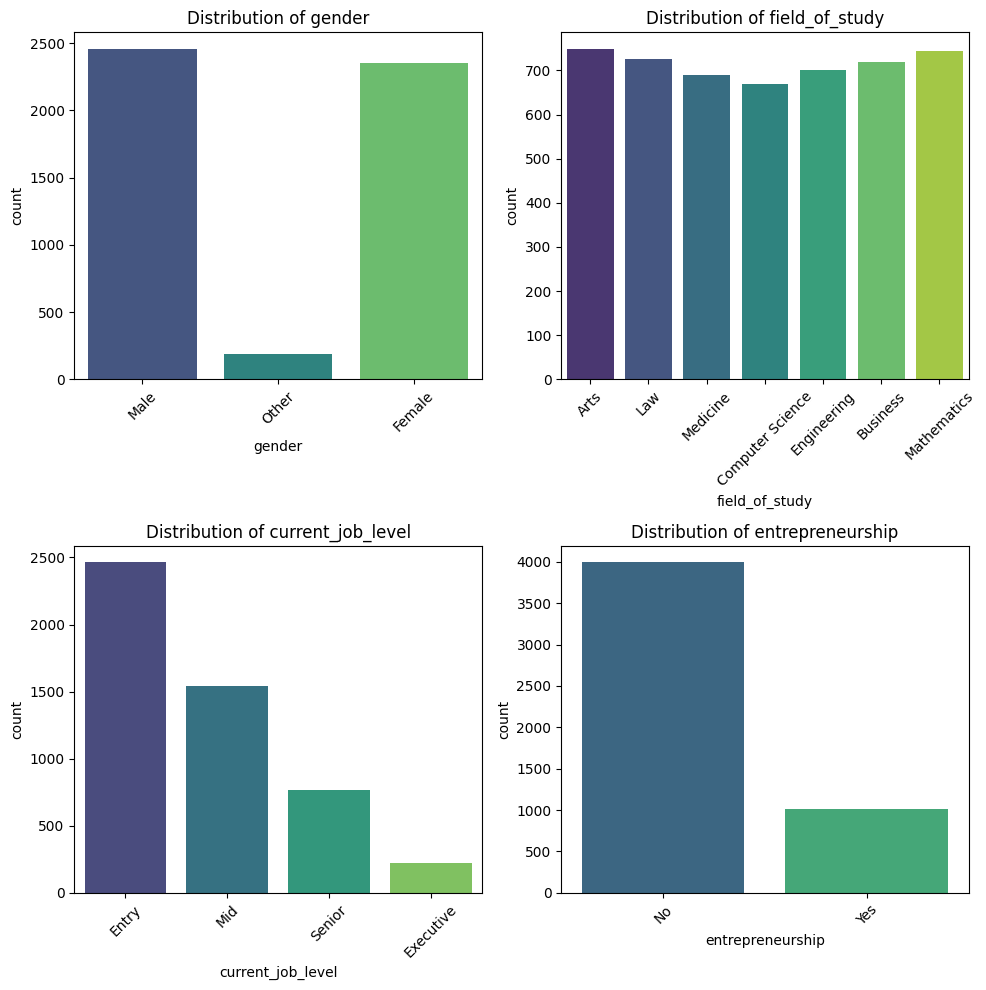

In [16]:
import math
n_features = len(categorical_features)
ncols = 2  # You can adjust the number of columns here
nrows = math.ceil(n_features / ncols)  # Calculate rows needed to fit all features

# Plot the countplot for each categorical feature
plt.figure(figsize=(10, nrows * 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)  # Create subplots with dynamic grid size
    sns.countplot(x=df1[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
from sklearn.preprocessing import MinMaxScaler
X = df1.drop('work_life_balance', axis='columns')
y = df1['work_life_balance']

# Strip any extra spaces from column names
df1.columns = df1.columns.str.strip()

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['gender', 'field_of_study', 'current_job_level', 'entrepreneurship'], drop_first=True)

# Recalculate numeric columns after one-hot encoding
cols_to_scale = X.select_dtypes(['int64', 'float64']).columns  

# Scale numeric columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Check summary statistics
print(X.describe())


               age  high_school_gpa    sat_score  university_ranking  \
count  5000.000000      5000.000000  5000.000000         5000.000000   
mean      0.494745         0.498489     0.505474            0.503839   
std       0.315792         0.287837     0.290327            0.291351   
min       0.000000         0.000000     0.000000            0.000000   
25%       0.181818         0.250000     0.251429            0.255255   
50%       0.454545         0.495000     0.510000            0.501001   
75%       0.727273         0.750000     0.760000            0.758759   
max       1.000000         1.000000     1.000000            1.000000   

       university_gpa  internships_completed  projects_completed  \
count     5000.000000            5000.000000         5000.000000   
mean         0.510014               0.495550            0.506978   
std          0.288024               0.352055            0.319214   
min          0.000000               0.000000            0.000000   
25%        

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [19]:
calculate_vif(X[cols_to_scale])

,Column,VIF
0,age,3.247407
1,high_school_gpa,3.650017
2,sat_score,3.729787
3,university_ranking,3.714462
4,university_gpa,3.794722
5,internships_completed,2.866688
6,projects_completed,3.274104
7,certifications,3.007644
8,soft_skills_score,3.333597
9,networking_score,3.284065


There is no multicollinerity in the features

# Modelling

In [20]:
X.head(3)

,age,high_school_gpa,sat_score,university_ranking,university_gpa,internships_completed,projects_completed,certifications,soft_skills_score,networking_score,...,field_of_study_Business,field_of_study_Computer Science,field_of_study_Engineering,field_of_study_Law,field_of_study_Mathematics,field_of_study_Medicine,current_job_level_Executive,current_job_level_Mid,current_job_level_Senior,entrepreneurship_Yes
0,0.545455,0.79,0.217143,0.290290,0.980,0.75,0.777778,0.4,0.888889,0.777778,...,False,False,False,False,False,False,False,False,False,False
1,0.272727,0.26,0.444286,0.111111,0.815,1.00,0.777778,0.6,0.777778,0.000000,...,False,False,False,True,False,False,False,True,False,False
2,0.909091,0.71,0.418571,0.714715,0.315,1.00,0.888889,0.2,0.000000,0.888889,...,False,False,False,False,False,True,False,False,False,False


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import numpy as np

# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror"),
    "SVR": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate models using 5-fold cross-validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mean_score = -np.mean(scores)  # Convert negative MAE to positive
    std_dev = np.std(scores)
    cv_results[name] = (mean_score, std_dev)

# Print results
for model, (mean, std) in cv_results.items():
    print(f"{model}: Mean CV Score = {mean:.4f}, Std Dev = {std:.4f}")

Linear Regression: Mean CV Score = 2.5185, Std Dev = 0.0556
Ridge Regression: Mean CV Score = 2.5184, Std Dev = 0.0556
Lasso Regression: Mean CV Score = 2.5189, Std Dev = 0.0540
Decision Tree: Mean CV Score = 3.3412, Std Dev = 0.0547
Random Forest: Mean CV Score = 2.5356, Std Dev = 0.0537
Gradient Boosting: Mean CV Score = 2.5331, Std Dev = 0.0579
XGBoost: Mean CV Score = 2.6749, Std Dev = 0.0576
SVR: Mean CV Score = 2.5596, Std Dev = 0.0582
KNN Regressor: Mean CV Score = 2.6993, Std Dev = 0.0778


# Conclusion

Based on the CV score, Linear Regression can be considered as a potential model for the dataset. However, its performance should be compared with other regression models to determine if it's the best choice. Additionally, evaluating error metrics like MAE and R² will help assess whether the model is suitable or if improvements are needed.